#**PROJECT AKHIR DATA WRANGLING**

##**Analisis Faktor Sosial Ekonomi terhadap Kasus HIV & AIDS di Indonesia Tahun 2024**

###Dosen Pengampu = Bu Ulfa Siti Nuraini, S.Stat., M.Stat.

####Disusun oleh:
####1. Adisti Eka Nabila (24031554119)
####2. Cantika Latifatul Nur Ella (24031554023)

##**1. SCRAPPING**

In [1]:
!pip install PyMupdf

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.1/24.1 MB 25.3 MB/s eta 0:00:00


In [2]:
!pip install pdfplumber

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.7/67.7 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.0/60.0 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 55.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 46.9 MB/s eta 0:00:00


In [3]:
!pip install tabula-py

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 77.3 MB/s eta 0:00:00


In [4]:
!pip install matplotlib

In [5]:
!pip install seaborn

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
import glob
import os
import fitz
import pandas as pd
import tabula
import pdfplumber
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
print(os.listdir('/content/drive/Shared drives/Project Data Wrangling/'))

['Profil Kesehatan Indonesia 2024.pdf', 'Tingkat Pengangguran 2024.csv', 'Rata Rata Lama Sekolah 2024.csv', 'Profile Kemiskinan di Indonesia.pdf']


In [9]:
pdf_hiv_aids = "/content/drive/Shared drives/Project Data Wrangling/Profil Kesehatan Indonesia 2024.pdf"

In [10]:
doc1 = fitz.open(pdf_hiv_aids)
doc1

Document('/content/drive/Shared drives/Project Data Wrangling/Profil Kesehatan Indonesia 2024.pdf')

In [11]:
doc1.metadata

{'format': 'PDF 1.5',
 'title': '',
 'author': '',
 'subject': '',
 'keywords': '',
 'creator': 'Adobe InDesign 15.1 (Macintosh)',
 'producer': 'Adobe PDF Library 15.0',
 'creationDate': "D:20250908122302+07'00'",
 'modDate': "D:20250908123409+07'00'",
 'trapped': '',
 'encryption': None}

In [12]:
print('Number of pages: ', doc1.page_count)

Number of pages:  534


In [13]:
page = doc1[3].get_text()
print(page)

Buku ini diterbitkan oleh:
Kementerian Kesehatan Republik Indonesia
Jalan HR. Rasuna Said Blok X-5 Kav 4-9, Jakarta 12950 
Telepon no: 62-21-5229590, 5221432, 5277168
Fax no: 62-21-5277168
E-mail: datainformasi.pusdatin@kemkes.go.id 
Website: http://www.kemkes/go.id
Katalog Dalam Terbitan. Kementerian Kesehatan RI 
Indonesia. Kementerian Kesehatan RI. Sekretariat Jenderal 
Profil Kesehatan Indonesia 2023.
Jakarta: Kementerian Kesehatan RI. 2024
1. Judul            I. HEALTH STATISTICS
II. HEALTH INFORMATION SYSTEMS
000.000
Ind                
p



###DATA HIV

In [14]:
tables = tabula.read_pdf(
    pdf_hiv_aids,
    pages=472,
    multiple_tables=True,
    lattice=True
)
scrape_hiv_df = tables[0]

In [15]:
scrape_hiv_df.head(7)

,No,Provinsi,Jumlah Kasus Baru HIV,Unnamed: 0,Unnamed: 1
0,NaN,NaN,2022,2023,2024
1,(1),(2),(3),(4),(5)
2,1,Aceh,269,279,352
3,2,Sumatera Utara,2.777,3.105,3.250
4,3,Sumatera Barat,526,579,654
5,4,Riau,766,914,1.007
6,5,Jambi,182,261,313


In [16]:
scrape_hiv_df.to_csv("scrape_hiv_raw.csv", index=False)

###DATA AIDS

In [17]:
tables = tabula.read_pdf(
    pdf_hiv_aids,
    pages=475,
    multiple_tables=True,
    lattice=True
)

scrape_aids_df = tables[0]

In [18]:
scrape_aids_df.head(7)

,No,Provinsi,Jumlah Kasus Baru,Jumlah Kasus Kumulatif\rs.d. Desember 2024,Unnamed: 0,Unnamed: 1
0,NaN,NaN,2022,2023,2024,NaN
1,(1),(2),(3),(4),(5),(6)
2,1,Aceh,33,88,130,NaN
3,2,Sumatera Utara,403,893,1.316,NaN
4,3,Sumatera Barat,109,156,238,NaN
5,4,Riau,223,263,345,NaN
6,5,Jambi,21,36,93,NaN


In [19]:
scrape_aids_df.to_csv("scrape_aids_raw.csv", index=False)

###DATA KEMISKINAN

In [20]:
pdf_kemiskinan = '/content/drive/Shared drives/Project Data Wrangling/Profile Kemiskinan di Indonesia.pdf'

In [21]:
doc2 = fitz.open(pdf_kemiskinan)
doc2

Document('/content/drive/Shared drives/Project Data Wrangling/Profile Kemiskinan di Indonesia.pdf')

In [22]:
print('Number of page', doc2.page_count)

Number of page 16


In [23]:
data = []
with pdfplumber.open(pdf_kemiskinan) as pdf:
    page = pdf.pages[9]
    table = page.extract_table()
    df = pd.DataFrame(table[1:], columns=table[0])
    data.append(df)

scrape_kemiskinan_df = pd.concat(data, ignore_index=True)

In [24]:
scrape_kemiskinan_df.head(7)

,Provinsi,None,Jumlah Penduduk Miskin (ribu),None,None,None,None,None
0,None,None,Perkotaan,None,Perdesaan,None,Total,None
1,None,None,Mar’24,Sep’24,Mar’24,Sep’24,Mar’24,Sep’24
2,(1),None,(2),(3),(4),(5),(6),(7)
3,1.,Aceh,"190,55","168,71","613,98","550,25","804,53","718,96"
4,2.,Sumatera Utara,"697,46","623,78","530,55","487,14","1.228,01","1.110,92"
5,3.,Sumatera Barat,"139,12","125,69","206,62","189,75","345,73","315,43"
6,4.,Riau,"200,91","183,28","291,34","289,76","492,25","473,04"


In [25]:
scrape_kemiskinan_df.to_csv("scrape_kemiskinan_raw.csv", index=False)

##**2. CLEANING & INTEGRASI**

###DATA HIV

In [26]:
df1 = scrape_hiv_df

df1.columns = ["No", "Provinsi", "2022", "2023", "2024"]

df1 = df1.iloc[2:]
df1 = df1.iloc[:-1]

df1 = df1[["Provinsi", "2024"]]

df1.rename(columns={"2024": "Kasus HIV 2024"}, inplace=True)

df1["Kasus HIV 2024"] = df1["Kasus HIV 2024"].str.replace(".", "", regex=False).astype(int)
df1_hiv = df1.reset_index(drop=True)

In [27]:
df1_hiv.head(7)

,Provinsi,Kasus HIV 2024
0,Aceh,352
1,Sumatera Utara,3250
2,Sumatera Barat,654
3,Riau,1007
4,Jambi,313
5,Sumatera Selatan,986
6,Bengkulu,173


In [28]:
df1_hiv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Provinsi        38 non-null     object
 1   Kasus HIV 2024  38 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 740.0+ bytes


In [29]:
df1_hiv['Provinsi'] = df1_hiv['Provinsi'].str.upper()
df1_hiv.head(7)

,Provinsi,Kasus HIV 2024
0,ACEH,352
1,SUMATERA UTARA,3250
2,SUMATERA BARAT,654
3,RIAU,1007
4,JAMBI,313
5,SUMATERA SELATAN,986
6,BENGKULU,173


In [30]:
df1_hiv.isna().sum()

,0
Provinsi,0
Kasus HIV 2024,0


In [31]:
df1.to_csv("data_hiv_clean.csv", index=False)

###DATA AIDS

In [32]:
df2 = scrape_aids_df

df2.columns = ["No", "Provinsi", "2022", "2023", "2024", "Kasus_Kumulatif"]

df2 = df2.iloc[2:]
df2 = df2.iloc[:-1]

df2 = df2[["Provinsi", "2024"]]

df2.rename(columns={"2024": "Kasus AIDS 2024"}, inplace=True)

df2["Kasus AIDS 2024"] = df2["Kasus AIDS 2024"].str.replace(".", "", regex=False).astype(int)
df2_aids = df2.reset_index(drop=True)

In [33]:
df2_aids.head(7)

,Provinsi,Kasus AIDS 2024
0,Aceh,130
1,Sumatera Utara,1316
2,Sumatera Barat,238
3,Riau,345
4,Jambi,93
5,Sumatera Selatan,332
6,Bengkulu,57


In [34]:
df2_aids.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Provinsi         38 non-null     object
 1   Kasus AIDS 2024  38 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 740.0+ bytes


In [35]:
df2_aids['Provinsi'] = df2_aids['Provinsi'].str.upper()
df2_aids.head(7)

,Provinsi,Kasus AIDS 2024
0,ACEH,130
1,SUMATERA UTARA,1316
2,SUMATERA BARAT,238
3,RIAU,345
4,JAMBI,93
5,SUMATERA SELATAN,332
6,BENGKULU,57


In [36]:
df2_aids.isna().sum()

,0
Provinsi,0
Kasus AIDS 2024,0


In [37]:
df2.to_csv("data_aids_clean.csv", index=False)

###DATA KEMISKINAN

In [38]:
df3 = scrape_kemiskinan_df

In [39]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Provinsi                       40 non-null     object
 1   None                           38 non-null     object
 2   Jumlah Penduduk Miskin (ribu)  42 non-null     object
 3   None                           41 non-null     object
 4   None                           42 non-null     object
 5   None                           41 non-null     object
 6   None                           42 non-null     object
 7   None                           41 non-null     object
dtypes: object(8)
memory usage: 2.8+ KB


In [40]:
missing=df3[df3["Provinsi"].isna()]
missing.head()

,Provinsi,None,Jumlah Penduduk Miskin (ribu),None,None,None,None,None
0,None,None,Perkotaan,None,Perdesaan,None,Total,None
1,None,None,Mar’24,Sep’24,Mar’24,Sep’24,Mar’24,Sep’24


In [41]:
df3 = df3.drop(index=[0,1,2]).reset_index(drop=True)
df3 = df3.iloc[:-1].reset_index(drop=True)

In [42]:
df3.columns = ["No", "Provinsi", "Perkotaan Mar'24", "perkotaan Sep'24", "Perdesaan Mar'24", "Perdesaan sep'24", "Total Mar'24", "Jumlah penduduk miskin"]
df3.columns.tolist()

['No',
 'Provinsi',
 "Perkotaan Mar'24",
 "perkotaan Sep'24",
 "Perdesaan Mar'24",
 "Perdesaan sep'24",
 "Total Mar'24",
 'Jumlah penduduk miskin']

In [43]:
df3_kemiskinan = df3[["Provinsi","Jumlah penduduk miskin"]]
df3_kemiskinan= df3_kemiskinan.replace("\n", " ", regex=True)
df3_kemiskinan.head(7)

,Provinsi,Jumlah penduduk miskin
0,Aceh,"718,96"
1,Sumatera Utara,"1.110,92"
2,Sumatera Barat,"315,43"
3,Riau,"473,04"
4,Jambi,"272,70"
5,Sumatera Selatan,"948,84"
6,Bengkulu,"261,15"


In [44]:
df3_kemiskinan["Jumlah penduduk miskin"] = (
    df3_kemiskinan["Jumlah penduduk miskin"]
    .astype(str)
    .str.replace('.', '', regex=False)
    .str.replace(',', '.', regex=False)
    .pipe(pd.to_numeric, errors='coerce')
)


In [45]:
df3_kemiskinan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 2 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Provinsi                38 non-null     object 
 1   Jumlah penduduk miskin  38 non-null     float64
dtypes: float64(1), object(1)
memory usage: 740.0+ bytes


In [46]:
df3_kemiskinan["Provinsi"] = df3_kemiskinan["Provinsi"].str.upper().str.strip()
df3_kemiskinan.head(7)


,Provinsi,Jumlah penduduk miskin
0,ACEH,718.96
1,SUMATERA UTARA,1110.92
2,SUMATERA BARAT,315.43
3,RIAU,473.04
4,JAMBI,272.70
5,SUMATERA SELATAN,948.84
6,BENGKULU,261.15


In [47]:
df3_kemiskinan.isna().sum()

,0
Provinsi,0
Jumlah penduduk miskin,0


In [48]:
df3.to_csv("data_kemiskinan_clean.csv", index=False)

###DATA PENGANGGURAN

In [49]:
csv_pengangguran = '/content/drive/Shared drives/Project Data Wrangling/Tingkat Pengangguran 2024.csv'

In [50]:
df4 = pd.read_csv(csv_pengangguran)

df4_pengangguran = df4[["nama_provinsi", "indeks_tpt"]]

In [51]:
df4_pengangguran.head(7)

,nama_provinsi,indeks_tpt
0,ACEH,5.75
1,SUMATERA UTARA,5.60
2,SUMATERA BARAT,5.75
3,RIAU,3.70
4,JAMBI,4.48
5,SUMATERA SELATAN,3.86
6,BENGKULU,3.11


In [52]:
df4_pengangguran.columns = ["Provinsi", "Indeks TPT"]
df4_pengangguran.columns.tolist()

['Provinsi', 'Indeks TPT']

In [53]:
df4_pengangguran.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Provinsi    38 non-null     object 
 1   Indeks TPT  38 non-null     float64
dtypes: float64(1), object(1)
memory usage: 740.0+ bytes


In [54]:
df4_pengangguran.head(7)

,Provinsi,Indeks TPT
0,ACEH,5.75
1,SUMATERA UTARA,5.60
2,SUMATERA BARAT,5.75
3,RIAU,3.70
4,JAMBI,4.48
5,SUMATERA SELATAN,3.86
6,BENGKULU,3.11


In [55]:
df4_pengangguran.isna().sum()

,0
Provinsi,0
Indeks TPT,0


In [56]:
df4_pengangguran.to_csv("data_pengangguran_clean.csv", index=False)

###DATA RATA" LAMA SEKOLAH

In [57]:
csv_rata_lama_sekolah = '/content/drive/Shared drives/Project Data Wrangling/Rata Rata Lama Sekolah 2024.csv'

In [58]:
df5 = pd.read_csv(csv_rata_lama_sekolah)
df5.head()

,Provinsi/Kabupaten/Kota,Unnamed: 1
0,NaN,[Metode Baru] Rata-rata Lama Sekolah (Tahun)
1,NaN,2024
2,ACEH,9.64
3,Simeulue,9.89
4,Aceh Singkil,8.72


In [59]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581 entries, 0 to 580
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Provinsi/Kabupaten/Kota  579 non-null    object
 1   Unnamed: 1               581 non-null    object
dtypes: object(2)
memory usage: 9.2+ KB


In [60]:
missing=df5[df5["Provinsi/Kabupaten/Kota"].isna()]
missing.head()

,Provinsi/Kabupaten/Kota,Unnamed: 1
0,NaN,[Metode Baru] Rata-rata Lama Sekolah (Tahun)
1,NaN,2024


In [61]:
df5 = df5.dropna(subset=["Provinsi/Kabupaten/Kota"]).reset_index(drop=True)

In [62]:
df5 = df5.iloc[:-1].reset_index(drop=True)

In [63]:
df5["Provinsi/Kabupaten/Kota"] = df5["Provinsi/Kabupaten/Kota"].str.replace("D I YOGYAKARTA", "DI YOGYAKARTA")
df5["Provinsi/Kabupaten/Kota"] = df5["Provinsi/Kabupaten/Kota"].str.replace("KEP. BANGKA BELITUNG", "KEPULAUAN BANGKA BELITUNG")

In [64]:
df5.columns = ["Provinsi","Rata-rata Lama Sekolah"]
df5.columns.tolist()

['Provinsi', 'Rata-rata Lama Sekolah']

In [65]:
df5["Rata-rata Lama Sekolah"] = pd.to_numeric(df5["Rata-rata Lama Sekolah"], errors="coerce")
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 578 entries, 0 to 577
Data columns (total 2 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Provinsi                578 non-null    object 
 1   Rata-rata Lama Sekolah  552 non-null    float64
dtypes: float64(1), object(1)
memory usage: 9.2+ KB


In [66]:
df5_sekolah = df5[["Provinsi", "Rata-rata Lama Sekolah"]]
df5_sekolah

,Provinsi,Rata-rata Lama Sekolah
0,ACEH,9.64
1,Simeulue,9.89
2,Aceh Singkil,8.72
3,Aceh Selatan,8.92
4,Aceh Tenggara,10.10
...,...,...
573,Tolikara,3.69
574,Mamberamo Tengah,3.70
575,Yalimo,3.55
576,Yahukimo,4.35


In [67]:
df5_sekolah = df5_sekolah[df5_sekolah["Provinsi"].str.isupper()].reset_index(drop=True)


In [68]:
df5_sekolah["Provinsi"] = df5_sekolah["Provinsi"].str.upper().str.strip()
df5_sekolah.head(7)


,Provinsi,Rata-rata Lama Sekolah
0,ACEH,9.64
1,SUMATERA UTARA,9.93
2,SUMATERA BARAT,9.44
3,RIAU,9.43
4,JAMBI,8.90
5,SUMATERA SELATAN,8.57
6,BENGKULU,9.04


In [69]:
df5_sekolah.isna().sum()

,0
Provinsi,0
Rata-rata Lama Sekolah,0


In [70]:
df5.to_csv("data_lama_sekolah_clean.csv", index=False)

###INTEGRASI BESAR

In [71]:
df_merge = (
    df3_kemiskinan
    .merge(df5_sekolah, on="Provinsi", how="outer")
    .merge(df4_pengangguran, on="Provinsi", how="outer")
    .merge(df1_hiv, on="Provinsi", how="outer")
    .merge(df2_aids, on="Provinsi", how="outer")
)


In [72]:
df_merge

,Provinsi,Jumlah penduduk miskin,Rata-rata Lama Sekolah,Indeks TPT,Kasus HIV 2024,Kasus AIDS 2024
0,ACEH,718.96,9.64,5.75,352,130
1,BALI,176.21,9.54,1.79,1998,779
2,BANTEN,777.49,9.23,6.68,2434,711
3,BENGKULU,261.15,9.04,3.11,173,57
4,DI YOGYAKARTA,430.47,9.92,3.48,928,250
5,DKI JAKARTA,449.07,11.49,6.21,5027,1820
6,GORONTALO,170.03,8.29,3.13,277,90
7,JAMBI,272.70,8.90,4.48,313,93
8,JAWA BARAT,3668.35,8.87,6.75,9893,3239
9,JAWA TENGAH,3396.34,8.02,4.78,6191,2058


In [73]:
df_merge.to_csv("DATA FINAL.csv", index=False)

##**3. EDA (Exploratory Data Analysis)**

####Cek Missing Values

In [74]:
df_merge.isna().sum()

,0
Provinsi,0
Jumlah penduduk miskin,0
Rata-rata Lama Sekolah,0
Indeks TPT,0
Kasus HIV 2024,0
Kasus AIDS 2024,0


###Cek Duplicate

In [75]:
df_merge.duplicated().sum()

np.int64(0)

###Cek Tipe Data

In [76]:
df_merge.dtypes

,0
Provinsi,object
Jumlah penduduk miskin,float64
Rata-rata Lama Sekolah,float64
Indeks TPT,float64
Kasus HIV 2024,int64
Kasus AIDS 2024,int64


###Cek Statistik Deskriptif

In [77]:
df_merge.describe()

,Jumlah penduduk miskin,Rata-rata Lama Sekolah,Indeks TPT,Kasus HIV 2024,Kasus AIDS 2024
count,38.000000,38.000000,38.000000,38.000000,38.000000
mean,633.018947,8.841316,4.379737,1676.500000,566.736842
std,944.382913,1.227811,1.414222,2394.915208,830.786917
min,41.110000,4.210000,1.320000,134.000000,0.000000
25%,163.310000,8.300000,3.217500,503.500000,143.500000
50%,299.630000,8.885000,4.190000,865.000000,258.500000
75%,698.477500,9.515000,5.712500,1359.000000,457.000000
max,3893.820000,11.490000,6.750000,10460.000000,3713.000000


###Finding Outlier

In [78]:
df6 = df_merge
num_cols = [
    "Jumlah penduduk miskin",
    "Rata-rata Lama Sekolah",
    "Indeks TPT",
    "Kasus HIV 2024",
    "Kasus AIDS 2024"
]

df_num = df6[num_cols]
Q1 = df_num.quantile(0.25)
Q3 = df_num.quantile(0.75)
IQR = Q3 - Q1


lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR
outlier_mask = (df_num < lower) | (df_num > upper)
outliers = df6[outlier_mask.any(axis=1)]


print("Outliers detected (per provinsi)")
print(outliers)


print("\nOutlier Boundaries (per variabel)")
print(pd.DataFrame({
    "Lower Bound": lower,
    "Upper Bound": upper
}))


Outliers detected (per provinsi)
            Provinsi  Jumlah penduduk miskin  Rata-rata Lama Sekolah  \
5        DKI JAKARTA                  449.07                   11.49   
8         JAWA BARAT                 3668.35                    8.87   
9        JAWA TENGAH                 3396.34                    8.02   
10        JAWA TIMUR                 3893.82                    8.28   
26  PAPUA PEGUNUNGAN                  331.12                    4.21   
28      PAPUA TENGAH                  287.54                    6.12   
37    SUMATERA UTARA                 1110.92                    9.93   

    Indeks TPT  Kasus HIV 2024  Kasus AIDS 2024  
5         6.21            5027             1820  
8         6.75            9893             3239  
9         4.78            6191             2058  
10        4.19           10460             3713  
26        1.32             559                0  
28        2.75            1311              433  
37        5.60            3250          

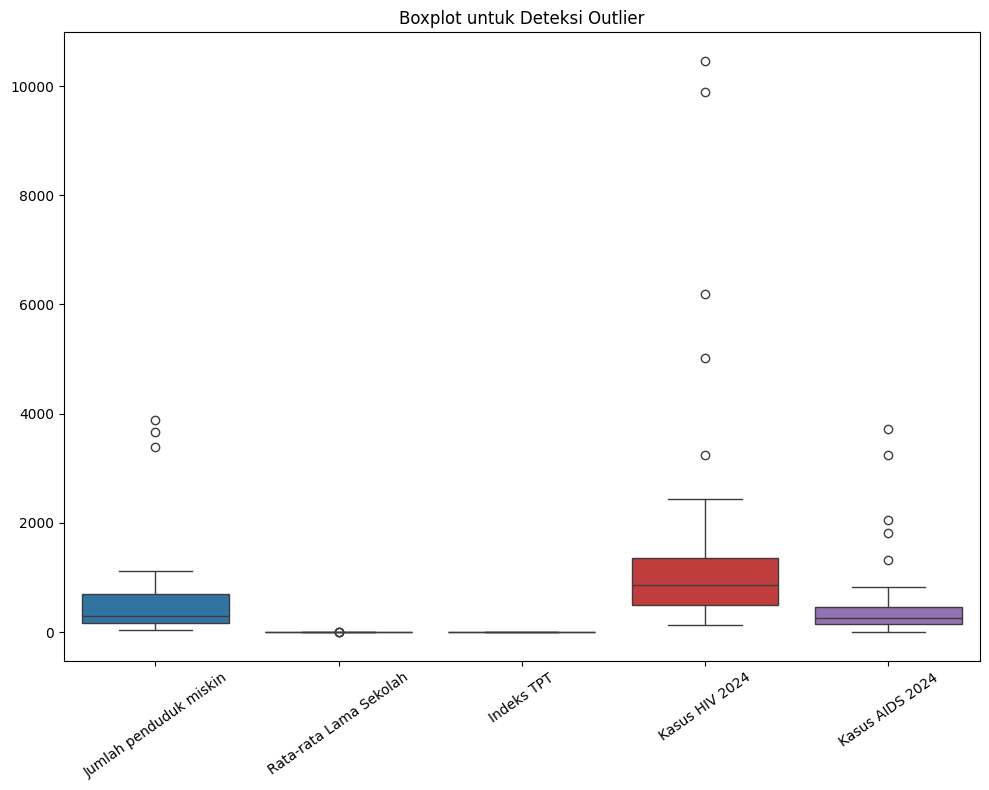

In [79]:
df_num = df6[[
    "Jumlah penduduk miskin",
    "Rata-rata Lama Sekolah",
    "Indeks TPT",
    "Kasus HIV 2024",
    "Kasus AIDS 2024"
]]

plt.figure(figsize=(10, 8))

sns.boxplot(data=df_num)

plt.title("Boxplot untuk Deteksi Outlier")
plt.xticks(rotation=35)
plt.tight_layout()

plt.show()


###Rasio Kasus HIV & AIDS

In [80]:
rasio_values = []

for hiv, aids in zip(df_merge["Kasus HIV 2024"], df_merge["Kasus AIDS 2024"]):
    if aids == 0:
        rasio_values.append(0)
    else:
        rasio_values.append(hiv / aids)

df_merge["Rasio HIV AIDS"] = rasio_values

In [81]:
df_merge[["Provinsi", "Rasio HIV AIDS"]].head(7)

,Provinsi,Rasio HIV AIDS
0,ACEH,2.707692
1,BALI,2.564827
2,BANTEN,3.423347
3,BENGKULU,3.035088
4,DI YOGYAKARTA,3.712000
5,DKI JAKARTA,2.762088
6,GORONTALO,3.077778


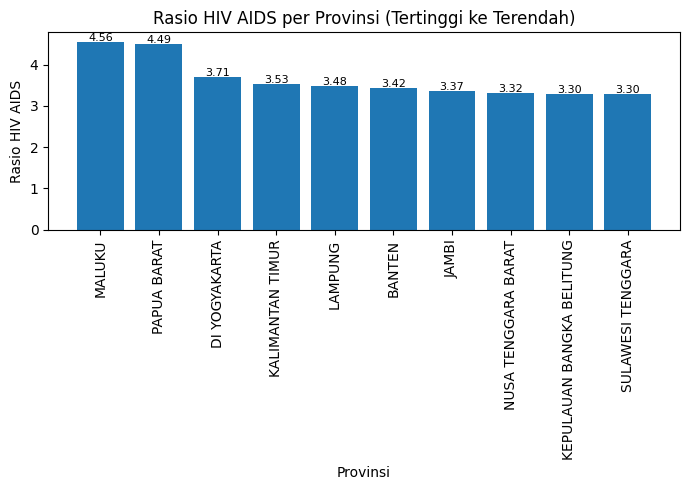

In [82]:
df_sorted = df_merge.sort_values(by="Rasio HIV AIDS", ascending=False).head(10)

plt.figure(figsize=(7,5))
plt.bar(df_sorted["Provinsi"], df_sorted["Rasio HIV AIDS"])

plt.xlabel("Provinsi")
plt.ylabel("Rasio HIV AIDS")
plt.title("Rasio HIV AIDS per Provinsi (Tertinggi ke Terendah)")

for i, v in enumerate(df_sorted["Rasio HIV AIDS"]):
    plt.text(i, v + 0.025, f"{v:.2f}", ha='center', fontsize=8)

plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

###HeatMap

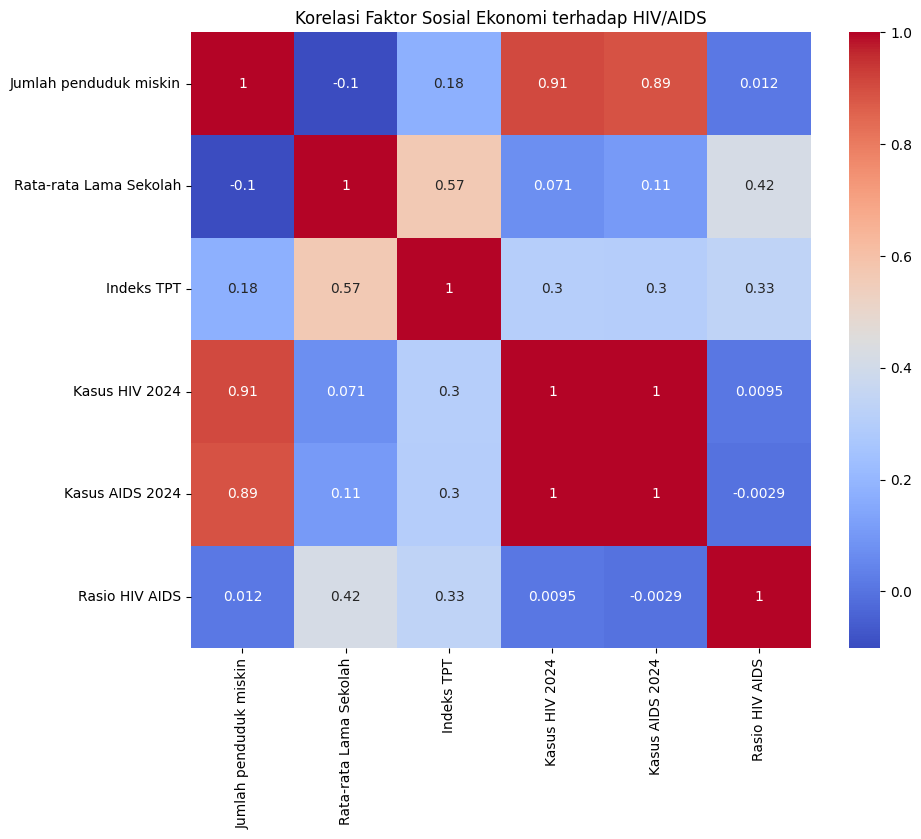

In [83]:
plt.figure(figsize=(10,8))
sns.heatmap(df_merge.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Korelasi Faktor Sosial Ekonomi terhadap HIV/AIDS")
plt.show()

###Scatter Plot

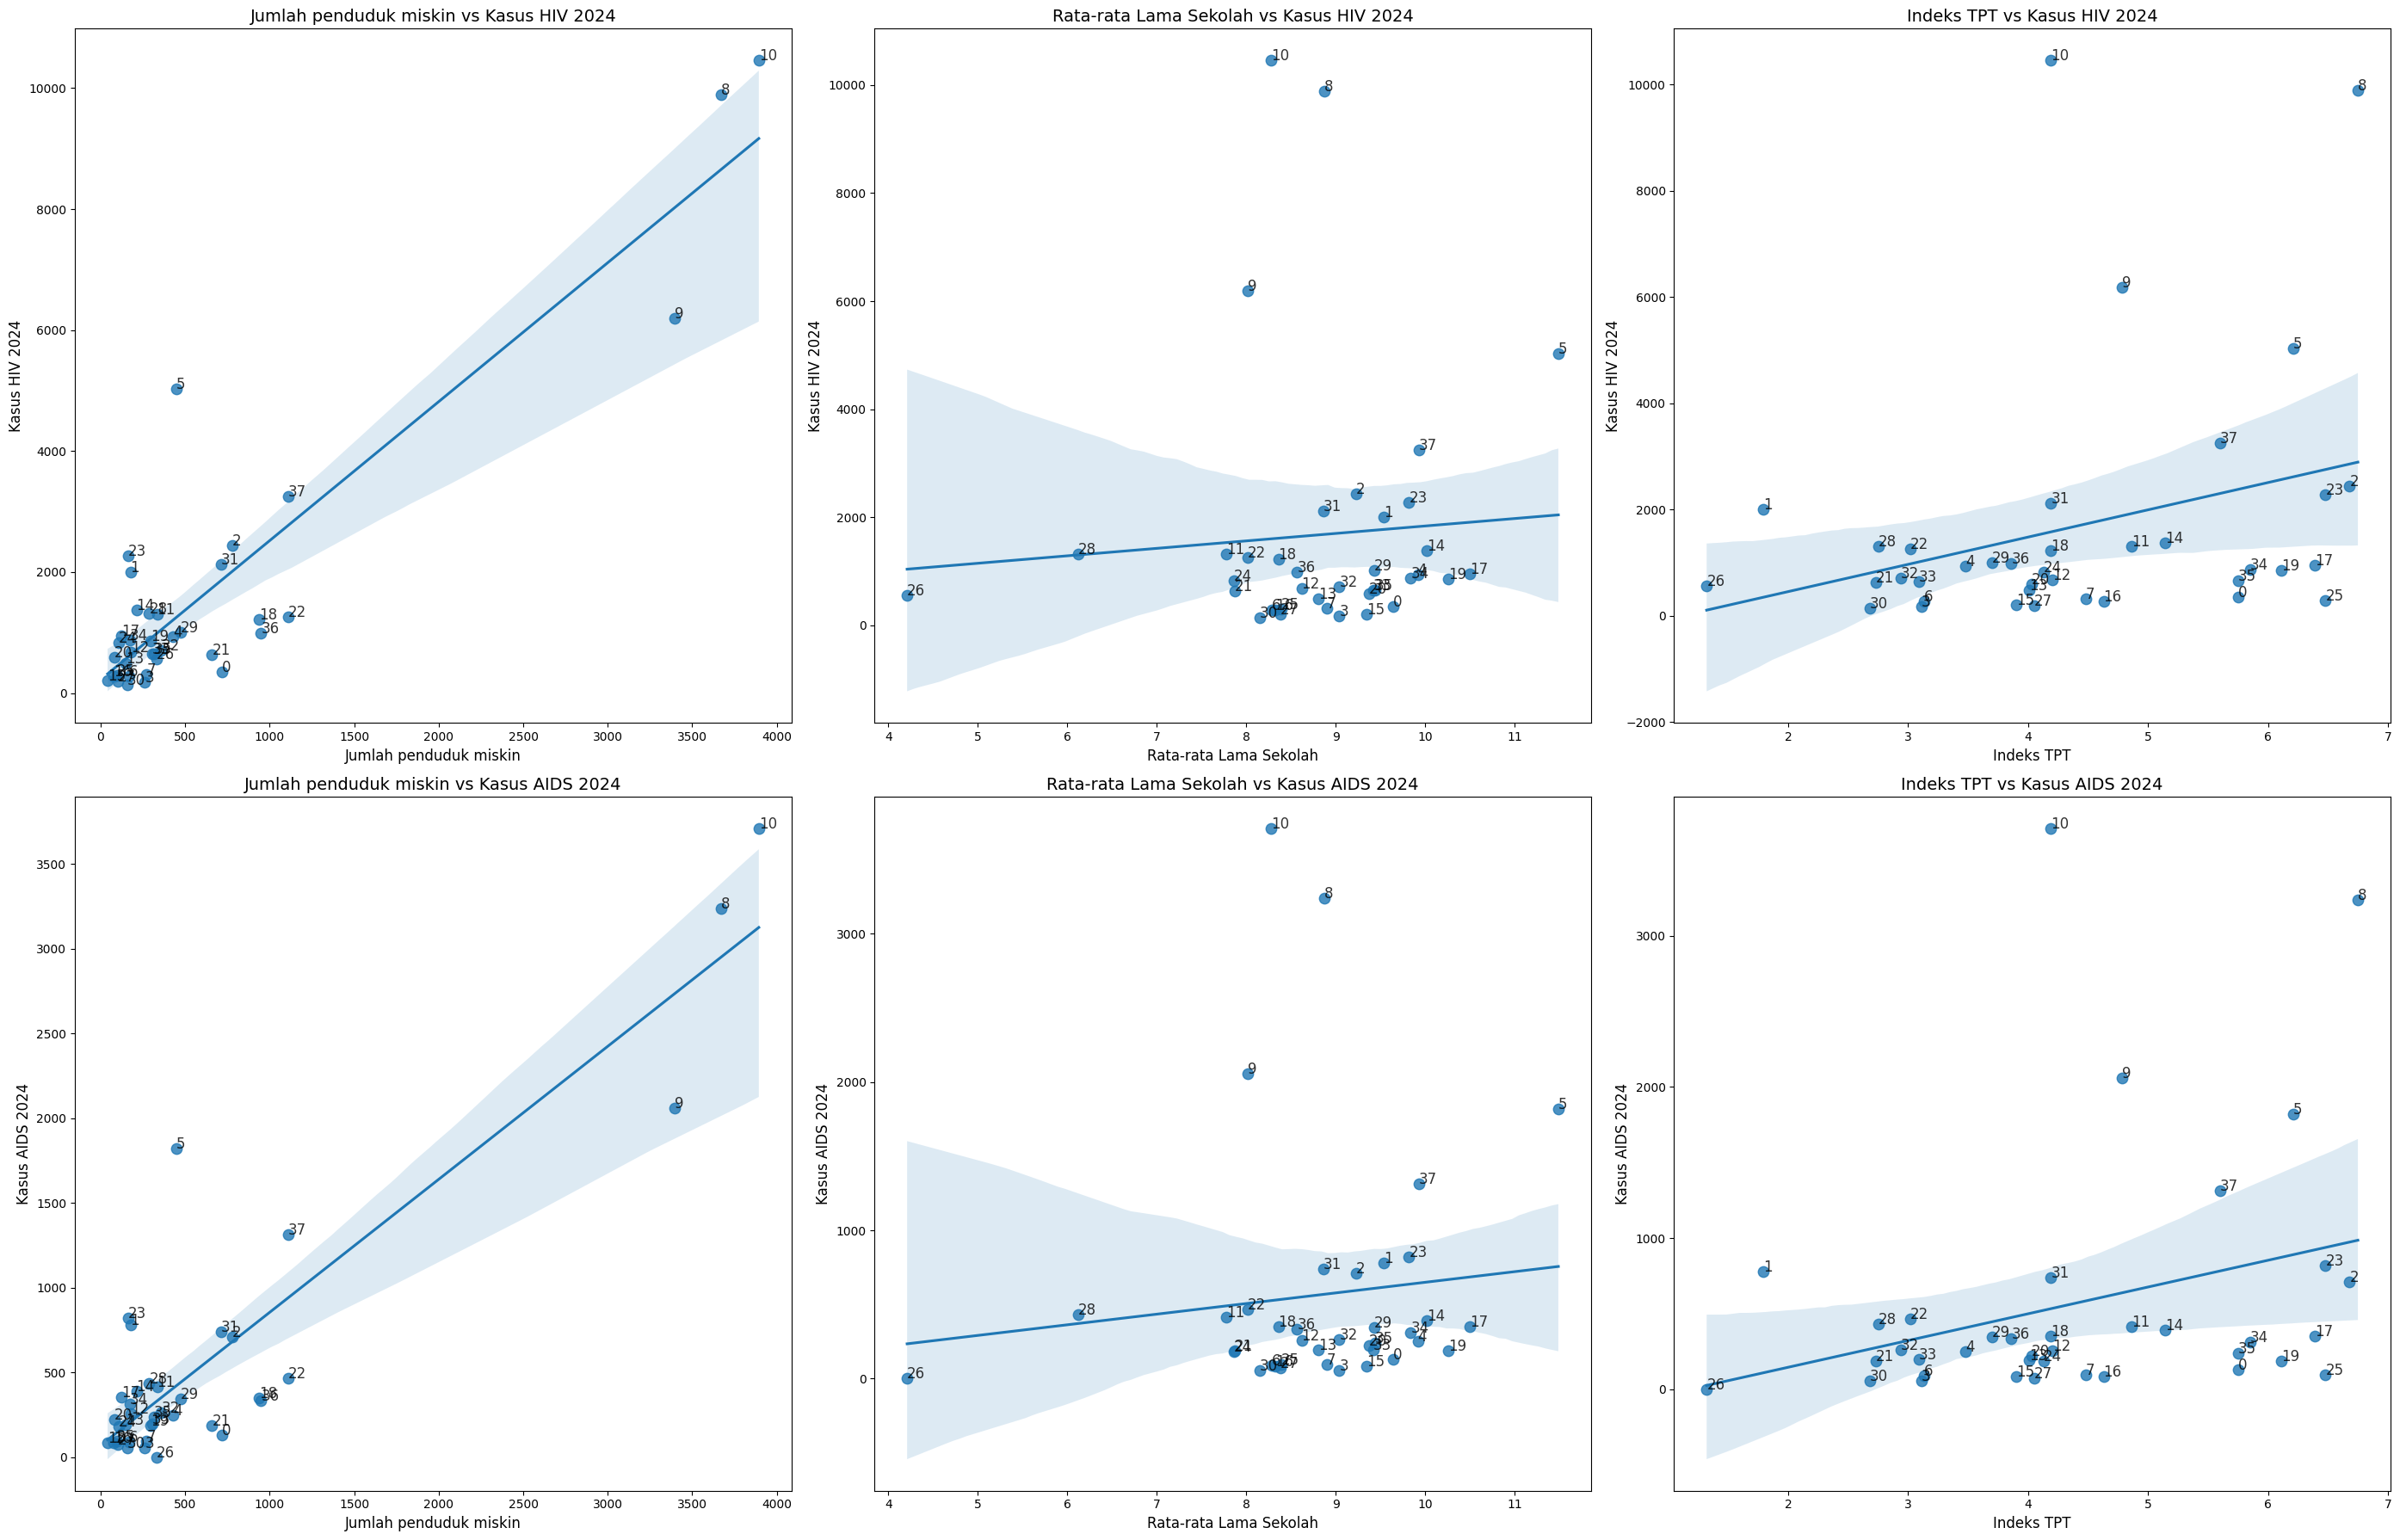

In [84]:
fig, axes = plt.subplots(2, 3, figsize=(28, 18))

targets = ["Kasus HIV 2024", "Kasus AIDS 2024"]
features = ["Jumlah penduduk miskin", "Rata-rata Lama Sekolah", "Indeks TPT"]

for row, target in enumerate(targets):
    for col, feature in enumerate(features):

        ax = axes[row, col]

        sns.regplot(
            ax=ax,
            data=df_merge,
            x=feature,
            y=target,
            scatter_kws={"s": 80}
        )

        ax.set_title(f"{feature} vs {target}", fontsize=14)
        ax.set_xlabel(feature, fontsize=12)
        ax.set_ylabel(target, fontsize=12)

        for i in range(len(df_merge)):
            ax.text(
                df_merge[feature].iloc[i],
                df_merge[target].iloc[i],
                str(df_merge.index[i]),
                fontsize=12,
                alpha=0.8
            )

plt.tight_layout()
plt.show()


###Peringkat Faktor Sosial-Ekonomi




In [85]:
df_merge.sort_values("Jumlah penduduk miskin", ascending=False).head(10)

,Provinsi,Jumlah penduduk miskin,Rata-rata Lama Sekolah,Indeks TPT,Kasus HIV 2024,Kasus AIDS 2024,Rasio HIV AIDS
10,JAWA TIMUR,3893.82,8.28,4.19,10460,3713,2.817129
8,JAWA BARAT,3668.35,8.87,6.75,9893,3239,3.054338
9,JAWA TENGAH,3396.34,8.02,4.78,6191,2058,3.008260
37,SUMATERA UTARA,1110.92,9.93,5.60,3250,1316,2.469605
22,NUSA TENGGARA TIMUR,1107.94,8.02,3.02,1255,465,2.698925
36,SUMATERA SELATAN,948.84,8.57,3.86,986,332,2.969880
18,LAMPUNG,939.30,8.36,4.19,1220,351,3.475783
2,BANTEN,777.49,9.23,6.68,2434,711,3.423347
0,ACEH,718.96,9.64,5.75,352,130,2.707692
31,SULAWESI SELATAN,711.77,8.86,4.19,2120,741,2.860999


In [86]:
df_merge.sort_values("Rata-rata Lama Sekolah", ascending=True).head(10)

,Provinsi,Jumlah penduduk miskin,Rata-rata Lama Sekolah,Indeks TPT,Kasus HIV 2024,Kasus AIDS 2024,Rasio HIV AIDS
26,PAPUA PEGUNUNGAN,331.12,4.21,1.32,559,0,0.000000
28,PAPUA TENGAH,287.54,6.12,2.75,1311,433,3.027714
11,KALIMANTAN BARAT,333.99,7.78,4.86,1309,415,3.154217
24,PAPUA BARAT,108.28,7.86,4.13,827,184,4.494565
21,NUSA TENGGARA BARAT,658.60,7.87,2.73,627,189,3.317460
9,JAWA TENGAH,3396.34,8.02,4.78,6191,2058,3.008260
22,NUSA TENGGARA TIMUR,1107.94,8.02,3.02,1255,465,2.698925
30,SULAWESI BARAT,155.91,8.15,2.68,134,56,2.392857
10,JAWA TIMUR,3893.82,8.28,4.19,10460,3713,2.817129
6,GORONTALO,170.03,8.29,3.13,277,90,3.077778


In [87]:
df_merge.sort_values("Indeks TPT", ascending=False).head(10)

,Provinsi,Jumlah penduduk miskin,Rata-rata Lama Sekolah,Indeks TPT,Kasus HIV 2024,Kasus AIDS 2024,Rasio HIV AIDS
8,JAWA BARAT,3668.35,8.87,6.75,9893,3239,3.054338
2,BANTEN,777.49,9.23,6.68,2434,711,3.423347
23,PAPUA,161.07,9.82,6.48,2275,819,2.777778
25,PAPUA BARAT DAYA,96.81,8.39,6.48,291,97,3.000000
17,KEPULAUAN RIAU,124.96,10.50,6.39,949,352,2.696023
5,DKI JAKARTA,449.07,11.49,6.21,5027,1820,2.762088
19,MALUKU,293.99,10.26,6.11,861,189,4.555556
34,SULAWESI UTARA,173.30,9.84,5.85,869,312,2.785256
35,SUMATERA BARAT,315.43,9.44,5.75,654,238,2.747899
0,ACEH,718.96,9.64,5.75,352,130,2.707692


In [88]:
df_merge.sort_values("Rasio HIV AIDS", ascending=False).head(10)

,Provinsi,Jumlah penduduk miskin,Rata-rata Lama Sekolah,Indeks TPT,Kasus HIV 2024,Kasus AIDS 2024,Rasio HIV AIDS
19,MALUKU,293.99,10.26,6.11,861,189,4.555556
24,PAPUA BARAT,108.28,7.86,4.13,827,184,4.494565
4,DI YOGYAKARTA,430.47,9.92,3.48,928,250,3.712000
14,KALIMANTAN TIMUR,211.88,10.02,5.14,1375,389,3.534704
18,LAMPUNG,939.30,8.36,4.19,1220,351,3.475783
2,BANTEN,777.49,9.23,6.68,2434,711,3.423347
7,JAMBI,272.70,8.90,4.48,313,93,3.365591
21,NUSA TENGGARA BARAT,658.60,7.87,2.73,627,189,3.317460
16,KEPULAUAN BANGKA BELITUNG,78.58,8.33,4.63,277,84,3.297619
33,SULAWESI TENGGARA,305.27,9.42,3.09,646,196,3.295918
